# Motivation

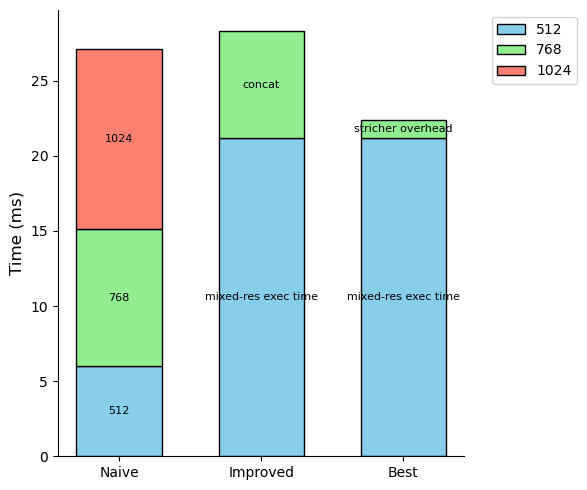

In [ ]:
# stacked bar chart
import matplotlib.pyplot as plt

bar1_naive = [
    (6, "512"),
    (9.1, "768"),
    (12, "1024"),
]

bar2_improved = [
    (21.2, "mixed-res exec time"),
    (7.1, "concat"),
]

bar3_best = [
    (21.2, "mixed-res exec time"),
    (1.2, "sticher overhead"),
]

bars = [bar1_naive, bar2_improved, bar3_best]
labels = ["Naive", "Improved", "Best"]

colors = ["skyblue", "lightgreen", "salmon", "orange", "lightcoral", "khaki"]

# Plot
fig, ax = plt.subplots(figsize=(6,5))

x = range(len(bars))
bar_width = 0.6

for i, bar in enumerate(bars):
    bottom = 0
    for j, (val, name) in enumerate(bar):
        ax.bar(x[i], val, bar_width, bottom=bottom, 
               label=name if i == 0 else "", color=colors[j % len(colors)], edgecolor="black")
        # Annotate
        ax.text(x[i], bottom + val/2, name, ha="center", va="center", fontsize=8, color="black")
        bottom += val

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=10)

# Y-axis label
ax.set_ylabel("Time (ms)", fontsize=legend_fontsize)

# Legend (only once)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Clean up chart style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("plot.pdf", format="pdf", dpi=500)
plt.show()

In [322]:
from matplotlib.ticker import MultipleLocator

distrifusion_c=0
nirvana_c=1
mixcache_c=2
mixfusion_c=3

c = [
    ("#f47f72", "#C72228", ),
    ("#B8E5FA", "#0C4E9B", ),
    ("#EEC186", "#FF991C", ),
    ("#B2DBB9", "#156434", ),
]

colors = [
    *[combo[0] for combo in c],
    "#EEF0A7", 
    "#F7A6AC", 
    "#F7B7D2",
]
dark_colors = [
    *[combo[1] for combo in c],
    "#FFBC80",
    "#6B98C4", 
    "#F5867F", 
]

line_markers = [
    "s", "o", "D", "X", "*",
]

left_label_color = "black"
right_label_color = "black"
label_fontsize = 14

bar_alpha = 0.7
line_width = 3
legend_fontsize = 16


# Abalation Distrifusion

['MixFusion Latency, 1GPU', 'Distrifusion Throughput', 'MixFusion Throughput']


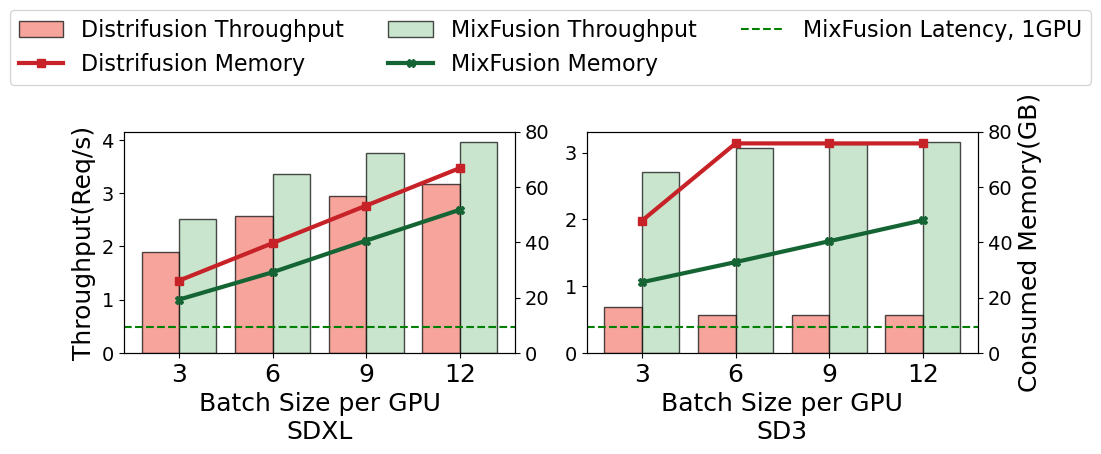

In [323]:
import numpy as np
import matplotlib.pyplot as plt

# sdxl
sdxl_mixfusion_latency = np.array([9.52, 14.32, 19.2, 24.24])
sdxl_mixfusion_memory = np.array([19.26, 29.16, 40.59, 51.74])
sdxl_distrifusion_latency = np.array([12.66, 18.63, 24.4, 30.2])
sdxl_distrifusion_memory = np.array([26.12, 39.68, 53.24, 66.8])

# sd3
sd3_mixfusion_latency = np.array([8.86, 15.68, 23.04, 30.41])
sd3_mixfusion_memory = np.array([25.54, 32.82, 40.36, 47.94])
sd3_distrifusion_latency = np.array([16.74 + 12 + 6, 58.66 + 16 + 10, 88 + 16 + 24, 117.32 + 32 + 20])
sd3_distrifusion_memory = np.array([47.76, 75.7, 75.7, 75.7])


slo_x_axis = np.arange(4)

# 设置阈值
threshold = 90
batch_size = np.array([3, 6, 9, 12]) * 8

# 创建图和3个子图
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

# 第一个子图
ax1 = axes[0]
ax1_twin = ax1.twinx() # 创建共享x轴的第二个Y轴
bar_width = 0.4
# 绘制柱状图
ax1.bar(slo_x_axis,  batch_size / sdxl_distrifusion_latency, bar_width, color=colors[distrifusion_c], alpha=bar_alpha, edgecolor='black', label='Distrifusion Throughput')
ax1.bar(slo_x_axis + bar_width, batch_size / sdxl_mixfusion_latency, bar_width, color=colors[mixfusion_c], alpha=bar_alpha, edgecolor='black', label='MixFusion Throughput')
ax1.set_ylabel('Throughput(Req/s)', fontsize=18)
ax1.set_xlabel('Batch Size per GPU\nSDXL', fontsize=18)
ax1.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
# ax1.set_ylim(0, 100) # 柱状图Y轴范围
ax1.set_xticks(slo_x_axis + 0.5 * bar_width, batch_size // 8, fontsize=18)
threshold_sdxl = 12 / 24.24
ax1.axhline(y=threshold_sdxl, color='green', linestyle='--', label='MixFusion Latency, 1GPU')

# 绘制折线图
ax1_twin.plot(slo_x_axis + 0.5 * bar_width, sdxl_distrifusion_memory, color=dark_colors[distrifusion_c], marker=line_markers[distrifusion_c], linewidth=line_width, label='Distrifusion Memory')
ax1_twin.plot(slo_x_axis + 0.5 * bar_width, sdxl_mixfusion_memory, color=dark_colors[mixfusion_c], marker=line_markers[mixfusion_c], linewidth=line_width, label='MixFusion Memory')
# ax1_twin.set_ylabel('Memory Consumption', fontsize=18)
ax1_twin.tick_params(axis='y', labelcolor=right_label_color, labelsize=label_fontsize)
ax1_twin.set_ylim(0, 80)  # control range
ax1_twin.yaxis.set_major_locator(MultipleLocator(20))  # ticks every 10 units
# ax1_twin.set_ylim(0, 150) # 折线图Y轴范围

# 添加阈值线

# 设置标题和图例
# ax1.set_title('SDXL')
handles_bar, labels_bar = fig.sca(ax1).get_legend_handles_labels()
handles_plot, labels_plot = fig.sca(ax1_twin).get_legend_handles_labels()
handles = []
labels = []

print(labels_bar)
for index in range(1, len(handles_bar)):
    handles.append(handles_bar[index])
    handles.append(handles_plot[index - 1])
    labels.append(labels_bar[index])
    labels.append(labels_plot[index - 1])

handles.append(handles_bar[0])
labels.append(labels_bar[0])


# 第二个子图
ax2 = axes[1]
ax2_twin = ax2.twinx()

ax2.bar(slo_x_axis, batch_size / sd3_distrifusion_latency, bar_width, color=colors[distrifusion_c], alpha=bar_alpha, edgecolor='black', label='Distrifusion Throughput')
ax2.bar(slo_x_axis + bar_width, batch_size / sd3_mixfusion_latency, bar_width, color=colors[mixfusion_c], alpha=bar_alpha, edgecolor='black', label='MixFusion Throughput')

# ax2.set_ylabel('SLO Satisfaction (%)', fontsize=18)
ax2.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
# ax2.set_ylim(0, 100)
ax2.set_xlabel('Batch Size per GPU\nSD3', fontsize=18)


ax2_twin.plot(slo_x_axis + 0.5 * bar_width, sd3_distrifusion_memory, color=dark_colors[distrifusion_c], marker=line_markers[distrifusion_c], linewidth=line_width, label='NIRVANA-Goodput')
ax2_twin.plot(slo_x_axis + 0.5 * bar_width, sd3_mixfusion_memory, color=dark_colors[mixfusion_c], marker=line_markers[mixfusion_c], linewidth=line_width, label='MixFusion-Goodput')

ax2_twin.set_ylabel('Consumed Memory(GB)', fontsize=18)
ax2_twin.tick_params(axis='y', labelcolor=right_label_color, labelsize=label_fontsize)
ax2_twin.set_ylim(0, 80)  # control range
ax2_twin.yaxis.set_major_locator(MultipleLocator(20))  # ticks every 10 units
# ax2_twin.set_ylim(0, 120)
ax2.set_xticks(slo_x_axis + 0.5 * bar_width, batch_size // 8, fontsize=18)
threshold_sd3 = 12 / 30.41
ax2.axhline(y=threshold_sd3, color='green', linestyle='--')
# ax2.set_title('SD3', fontsize=20)

# yticks = list(ax2.get_yticks()) # 获取现有刻度
# ticks = []
# for tick in yticks:
#     if not (abs(tick - threshold_sd3) / threshold_sd3 < 0.05):
#         ticks.append(tick)
# yticks = ticks
# if threshold_sd3 not in yticks:
#     yticks.append(threshold_sd3) # 添加阈值到刻度列表

# yticks.sort() # 排序
# yticklabels = [f'{y:.1f}' for y in yticks] # 格式化为字符串
# if threshold_sd3 in yticks:
#     yticklabels[yticks.index(threshold_sd3)] = f'{threshold_sd3:.1f}' # 找到阈值并修改其标签
# ax2.set_yticks(yticks)

fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(2.5, 1.6), ncol=3, fontsize=legend_fontsize, bbox_transform=ax1.transAxes)
# plt.subplots_adjust(bottom=0.22, top=0.8, left=0.05, right=0.95)
# plt.tight_layout(rect=[0.01, 0.01, 0.99, 0.87])
plt.tight_layout()
plt.savefig("ablation_distrifusion.pdf", dpi=500, format="pdf", bbox_inches="tight")

# 调整布局

plt.show()

# E2E SLO

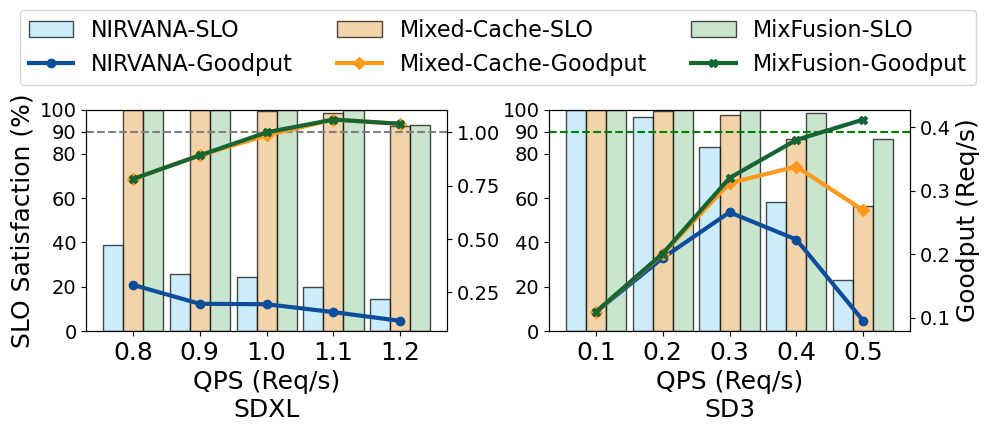

In [324]:
import matplotlib.pyplot as plt
import numpy as np


# 创建数据
# categories = ['A', 'B', 'C', 'D', 'E']
sdxl_qps = [0.8, 0.9, 1.0, 1.1, 1.2]
sd3_qps = [0.1, 0.2, 0.3, 0.4, 0.5]

# sdxl
sdxl_nirvana_slo = [0.386, 0.258, 0.244, 0.198, 0.144]
sdxl_mixed_cache_slo = [1, 0.998, 0.994, 0.986, 0.926]
sdxl_mixfusion_slo = [1, 1, 1, 0.998, 0.93]

# sd3
sd3_nirvana_slo = [1, 0.964, 0.83, 0.584, 0.228]
sd3_mixed_cache_slo = [1, 0.994, 0.974, 0.868, 0.566]
sd3_mixfusion_slo = [1, 1, 0.998, 0.982, 0.868]

# sdxl
sdxl_nirvana_goodput = [0.285, 0.196, 0.194, 0.157, 0.116]
sdxl_mixed_cache_goodput = [0.781, 0.892, 0.986, 1.06, 1.04]
sdxl_mixfusion_goodput = [0.781, 0.892, 1, 1.06, 1.04]

# sd3
sd3_nirvana_goodput = [0.109, 0.194, 0.266, 0.223, 0.095]
sd3_mixed_cache_goodput = [0.109, 0.2, 0.312, 0.338, 0.269]
sd3_mixfusion_goodput = [0.109, 0.201, 0.32, 0.38, 0.412]
# bar_values_1 = np.random.rand(len(categories))
# line_values_1 = np.random.rand(len(categories)) * 100

# bar_values_2 = np.random.rand(len(categories)) * 1.2
# line_values_2 = np.random.rand(len(categories)) * 80 + 20

# bar_values_3 = np.random.rand(len(categories)) * 0.8
# line_values_3 = np.random.rand(len(categories)) * 120

slo_x_axis = np.arange(5)

# 设置阈值
threshold = 90

# 创建图和3个子图
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

# 第一个子图
ax1 = axes[0]
ax1_twin = ax1.twinx() # 创建共享x轴的第二个Y轴
bar_width = 0.3
# 绘制柱状图
ax1.bar(slo_x_axis, np.array(sdxl_nirvana_slo) * 100, bar_width, color=colors[nirvana_c], alpha=bar_alpha, edgecolor='black', label='NIRVANA-SLO')
ax1.bar(slo_x_axis + bar_width, np.array(sdxl_mixed_cache_slo) * 100, bar_width, color=colors[mixcache_c], alpha=bar_alpha,  edgecolor='black', label='Mixed-Cache-SLO')
ax1.bar(slo_x_axis + bar_width * 2, np.array(sdxl_mixfusion_slo) * 100, bar_width, color=colors[mixfusion_c], alpha=bar_alpha, edgecolor='black', label='MixFusion-SLO')
ax1.set_ylabel('SLO Satisfaction (%)', fontsize=18)
ax1.set_xlabel('QPS (Req/s)\nSDXL', fontsize=18)
ax1.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
ax1.set_ylim(0, 100) # 柱状图Y轴范围
ax1.set_xticks(slo_x_axis + 1 * bar_width, sdxl_qps, fontsize=18)
yticks = list(ax1.get_yticks()) # 获取现有刻度
if threshold not in yticks:
    yticks.append(threshold) # 添加阈值到刻度列表
yticks.sort() # 排序
yticklabels = [f'{y:.1f}' for y in yticks] # 格式化为字符串
if threshold in yticks:
    yticklabels[yticks.index(threshold)] = f'{threshold:.1f} Threshold' # 找到阈值并修改其标签
ax1.set_yticks(yticks)

# 绘制折线图
ax1_twin.plot(slo_x_axis + 1 * bar_width, sdxl_nirvana_goodput, color=dark_colors[nirvana_c], marker=line_markers[nirvana_c], linewidth=line_width, label='NIRVANA-Goodput')
ax1_twin.plot(slo_x_axis + 1 * bar_width, sdxl_mixed_cache_goodput, color=dark_colors[mixcache_c], marker=line_markers[mixcache_c], linewidth=line_width, label='Mixed-Cache-Goodput')
ax1_twin.plot(slo_x_axis + 1 * bar_width, sdxl_mixfusion_goodput, color=dark_colors[mixfusion_c], marker=line_markers[mixfusion_c], linewidth=line_width, label='MixFusion-Goodput')
# ax1_twin.set_ylabel('Goodput (Req/s)', fontsize=18)
ax1_twin.tick_params(axis='y', labelcolor=right_label_color, labelsize=label_fontsize)
# ax1_twin.set_ylim(0, 150) # 折线图Y轴范围

# 添加阈值线
ax1.axhline(y=threshold, color='gray', linestyle='--')

# 设置标题和图例
# ax1.set_title('SDXL')
handles_bar, labels_bar = fig.sca(ax1).get_legend_handles_labels()
handles_plot, labels_plot = fig.sca(ax1_twin).get_legend_handles_labels()
handles = []
labels = []
for index in range(len(handles_bar)):
    handles.append(handles_bar[index])
    handles.append(handles_plot[index])
    labels.append(labels_bar[index])
    labels.append(labels_plot[index])


# 第二个子图
ax2 = axes[1]
ax2_twin = ax2.twinx()

ax2.bar(slo_x_axis, np.array(sd3_nirvana_slo) * 100, bar_width, color=colors[nirvana_c], alpha=bar_alpha, edgecolor='black', label='NIRVANA-SLO')
ax2.bar(slo_x_axis + bar_width, np.array(sd3_mixed_cache_slo) * 100, bar_width, color=colors[mixcache_c], alpha=bar_alpha, edgecolor='black', label='Mixed-Cache-SLO')
ax2.bar(slo_x_axis + bar_width * 2, np.array(sd3_mixfusion_slo) * 100, bar_width, color=colors[mixfusion_c], alpha=bar_alpha, edgecolor='black', label='MixFusion-SLO')

# ax2.set_ylabel('SLO Satisfaction (%)', fontsize=18)
ax2.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
ax2.set_ylim(0, 100)
ax2.set_xlabel('QPS (Req/s)\nSD3', fontsize=18)


ax2_twin.plot(slo_x_axis + 1 * bar_width, sd3_nirvana_goodput, color=dark_colors[nirvana_c], marker=line_markers[nirvana_c], linewidth=line_width, label='NIRVANA-Goodput')
ax2_twin.plot(slo_x_axis + 1 * bar_width, sd3_mixed_cache_goodput, color=dark_colors[mixcache_c], marker=line_markers[mixcache_c], linewidth=line_width, label='Mixed-Cache-Goodput')
ax2_twin.plot(slo_x_axis + 1 * bar_width, sd3_mixfusion_goodput, color=dark_colors[mixfusion_c], marker=line_markers[mixfusion_c], linewidth=line_width, label='MixFusion-Goodput')

ax2_twin.set_ylabel('Goodput (Req/s)', fontsize=18)
ax2_twin.tick_params(axis='y', labelcolor=right_label_color, labelsize=label_fontsize)
# ax2_twin.set_ylim(0, 120)
ax2.set_xticks(slo_x_axis + 1 * bar_width, sd3_qps, fontsize=18)
ax2.axhline(y=threshold, color='green', linestyle='--')
# ax2.set_title('SD3', fontsize=20)

yticks = list(ax2.get_yticks()) # 获取现有刻度
if threshold not in yticks:
    yticks.append(threshold) # 添加阈值到刻度列表
yticks.sort() # 排序
yticklabels = [f'{y:.1f}' for y in yticks] # 格式化为字符串
if threshold in yticks:
    yticklabels[yticks.index(threshold)] = f'{threshold:.1f}' # 找到阈值并修改其标签
ax2.set_yticks(yticks)

# plt.subplots_adjust(bottom=0.01, top=0.75, left=0.05, right=0.95)
# plt.tight_layout(rect=[0.03, 0, 0.97, 0.9])
# plt.savefig("e2e_performance.pdf", dpi=500, format="pdf")
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(2.5, 1.5), ncol=3, fontsize=legend_fontsize, bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.savefig("e2e_performance.pdf", dpi=500, format="pdf", bbox_inches="tight")

plt.show()

# Overhead

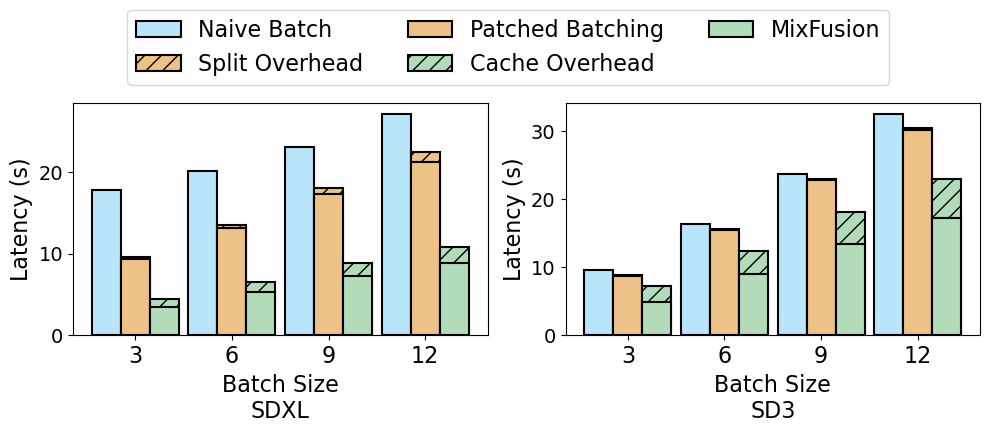

In [325]:
import numpy as np
import matplotlib.pyplot as plt

def plot(ax, name):
    width = 0.3
    x_axis = np.arange(4)
    ticks = [3, 6, 9, 12]
    bar_alpha = 1
    ax.bar(x_axis,  total_overhead,width, label='Naive Batch', edgecolor='black', linewidth=1.5, color=colors[1], alpha=bar_alpha)
    ax.bar(x_axis + width, split_latency, width, label='Split Overhead',edgecolor='black', linewidth=1.5,  color=colors[2], hatch="//", alpha=bar_alpha)
    ax.bar(x_axis + width, (split_latency - split_overhead), width, label='Patched Batching', edgecolor='black', linewidth=1.5, color=colors[2], alpha=bar_alpha)
    ax.bar(x_axis + 2 * width,  (latency),width, label='Cache Overhead', edgecolor='black', linewidth=1.5, color=colors[3], hatch="//", alpha=bar_alpha)
    ax.bar(x_axis + 2 * width,  (latency - cache_overhead),width, label='MixFusion',edgecolor='black', linewidth=1.5,  color=colors[3], alpha=bar_alpha)
    ax.set_xlabel(f'Batch Size\n{name}',fontsize=16)  # X轴标签
    ax.set_ylabel('Latency (s)',fontsize=16)      # Y轴标签
    ax.set_xticks(x_axis + 1 * width, ticks, fontsize=16)
    ax.tick_params(axis="y", labelsize=label_fontsize)
    # ax.set_yticks(fontsize=16)

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

# sdxl
latency = np.array([22.08 / 5, 32.56 / 5, 44.23 / 5, 54.28 / 5])
split_latency = np.array([9.52, 13.52, 18.04, 22.4])
split_overhead = np.array([1.06 / 5, 1.97 / 5, 3.43 / 5, 5.85 / 5])
cache_overhead = np.array([4.59 / 5, 6.39 / 5, 8.28 / 5, 9.98 / 5])
total_overhead = np.array([5.4 + 5.8 + 6.6, 5.5 + 6.4 + 8.25, 5.75 + 7.25 + 10.04, 6 + 9.1 + 12])
cache_gpu = np.array([])
split_gpu = np.array([])
naive_gpu = np.array([79.66, 92.3, 94.84, 95.13])
plot(axes[0], "SDXL")

ax1 = axes[0]
handles_bar, labels_bar = fig.sca(ax1).get_legend_handles_labels()
handles = []
labels = []
for index in range(len(handles_bar)):
    handles.append(handles_bar[index])
    labels.append(labels_bar[index])

fig.legend(handles, labels, loc="upper center", 
           bbox_to_anchor=(1.05, 1.45), 
           ncol=3, fontsize=legend_fontsize, bbox_transform=ax1.transAxes)

# sd3
latency = np.array([7.21, 12.44, 18.1, 23.04])
split_latency = np.array([8.86, 15.68, 23.04, 30.41])
split_overhead = np.array([0.12, 0.14, 0.16, 0.18])
cache_overhead = np.array([2.38, 3.5, 4.7, 5.8])
total_overhead = np.array([1.97 + 2.75 + 4.87, 2.43 + 4.97 + 9.02, 3.46 + 6.99 + 13.19, 4.37 + 10.87 + 17.29])
cache_gpu = np.array([67.11, 75.86, 80.31, 83.96])
split_gpu = np.array([96.2, 97.53, 98.37, 98.94])
naive_gpu = np.array([94.63, 97.08, 98.01, 98.71])
plot(axes[1], "SD3")

# plt.title('Basic Bar Chart')  # 图表标题
# plt.legend(fontsize=10)
# plt.ylim(0,30)
# plt.tight_layout()
# plt.subplots_adjust(bottom=0.2, left=0.2, top=0.99, right=0.99)
# plt.tight_layout(rect=[0, 0, 1, 1])
plt.tight_layout()
plt.savefig("overhead.pdf", dpi=500, format="pdf", bbox_inches="tight")
plt.show()

# Save Computations

<Figure size 500x300 with 0 Axes>

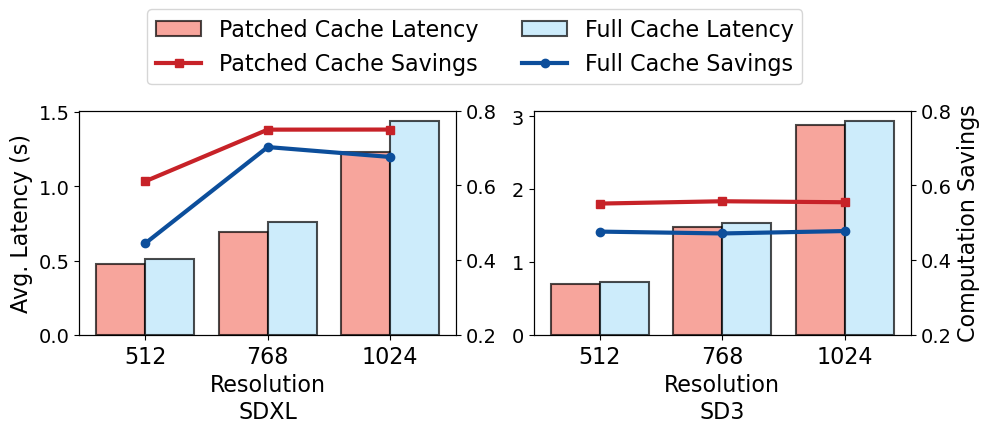

In [326]:
x_axis = np.arange(3)
plt.figure(figsize=(5, 3))
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

def plot(ax1, ax2, name):
    # 绘制柱状图
    bar_width = 0.4
    ax1.bar(x_axis, patched['latency'], width=bar_width, color=colors[0], alpha=bar_alpha, edgecolor='black', linewidth=1.5,  label='Patched Cache Latency')
    ax1.bar(x_axis + bar_width, full['latency'], width=bar_width, color=colors[1], alpha=bar_alpha, edgecolor='black', linewidth=1.5,  label='Full Cache Latency')

    # 设置主轴标签
    ax1.set_xlabel(f'Resolution\n{name}', fontsize=16)
    if name == "SDXL":
        ax1.set_ylabel('Avg. Latency (s)', fontsize=16)
    # ax1.tick_params(axis='y', labelcolor='b')
    # plt.yticks(fontsize=16)
    ax1.tick_params(axis="y", labelsize=label_fontsize)

    # 绘制折线图
    ax2.plot(x_axis + 0.5 * bar_width, patched['savings'], color=dark_colors[0], marker=line_markers[0], linewidth=line_width, label='Patched Cache Savings')
    ax2.plot(x_axis + 0.5 * bar_width, full['savings'], color=dark_colors[1], marker=line_markers[1], linewidth=line_width, label='Full Cache Savings')

    # 设置副轴标签
    if name == "SD3":
        ax2.set_ylabel('Computation Savings', fontsize=16)
    # ax2.set_ylim(0.2, 0.6)
    # plt.yticks(fontsize=16)
    ax2.tick_params(axis="y", labelsize=label_fontsize)
    ticks = ["512", "768", "1024"]
    # ax2.tick_params(axis='y', labelcolor='r')
    ax1.set_xticks(x_axis + 0.5 * bar_width, ticks, fontsize=16)
    ax2.set_ylim(0.2, 0.8)  # control range
    ax2.yaxis.set_major_locator(MultipleLocator(0.2))  # ticks every 10 units
    # 设置标题
    # plt.title('Bar and Line Chart on the Same Plot')

# sdxl
base = 2 * 7 * 50 * 100
patched = {
    "latency": np.array([1534 / (100 * 32), 1107 / (100 * 16), 1972 / (100 * 16)]),
    "savings": np.array([5474691 / (base * 4 * 32), 7548550 / (base * 9 * 16), 13423692 / (base * 16 * 16)])
}
full = {
    "latency": np.array([1632 / (100 * 32), 1221 / (100 * 16), 2303 / (100 * 16)]),
    "savings": np.array([3990016 / (base * 4 * 32), 7079904 / (base * 9 * 16), 12112384 / (base * 16 * 16)])
}
ax1 = axes[0]
ax1_twin = ax1.twinx()
plot(ax1, ax1_twin, "SDXL")

handles_bar, labels_bar = fig.sca(ax1).get_legend_handles_labels()
handles_plot, labels_plot = fig.sca(ax1_twin).get_legend_handles_labels()
handles = []
labels = []
for index in range(len(handles_bar)):
    handles.append(handles_bar[index])
    handles.append(handles_plot[index])
    labels.append(labels_bar[index])
    labels.append(labels_plot[index])
fig.legend(handles, labels, loc="upper center", 
           bbox_to_anchor=(1.05, 1.5), 
           ncol=2, fontsize=legend_fontsize, bbox_transform=ax1.transAxes)
12
# sd3
base = 2 * 24 * 50 * 16
patched = {
    "latency": np.array([11.2 / 16, 23.62 / 16, 23.1 / (8)]),
    "savings": np.array([84693 / (base * 4), 192694 / (base * 9), 170477 * 2 / (base * 16)])
}
full = {
    "latency": np.array([11.6 / 16, 24.6 / 16, 23.47 / (8)]),
    "savings": np.array([73190 / (base * 4), 162979 / (base * 9), 146841 * 2 / (base * 16)])
}
ax2 = axes[1]
ax2_twin = ax2.twinx()
plot(ax2, ax2_twin, "SD3")

# plt.subplots_adjust(top=0.85, right=0.85, left=0.15)
# plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.tight_layout()
plt.savefig("savings.pdf", dpi=500, format="pdf", bbox_inches="tight")
plt.show()

# Sensitivity distribution

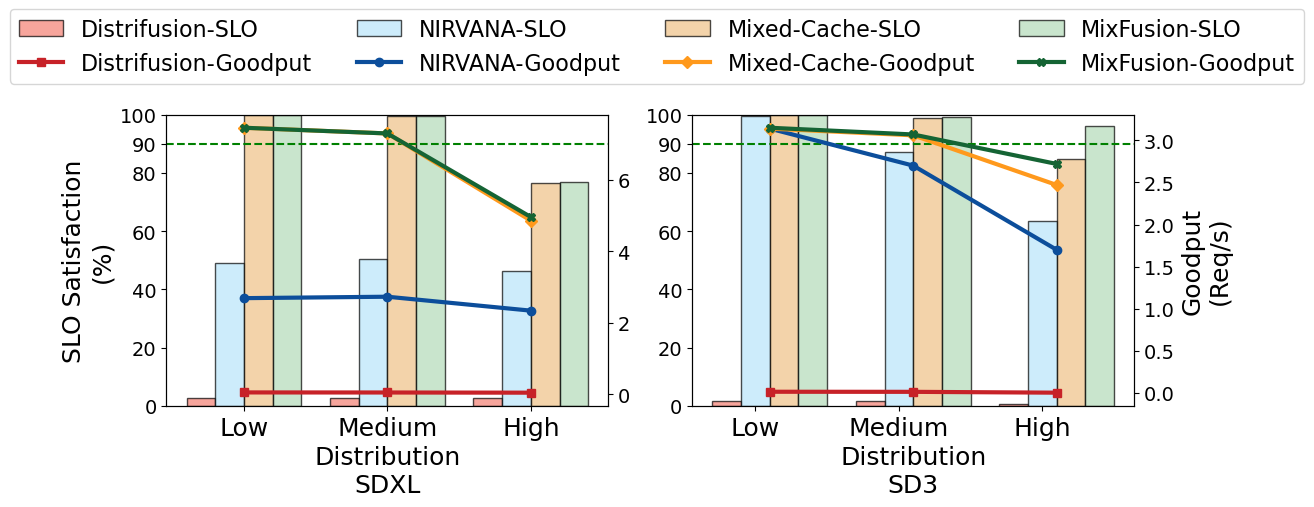

In [336]:
# sdxl
sdxl_distrifusion_slo = [0.026, 0.026, 0.026]
sdxl_nirvana_slo = [0.492, 0.504, 0.464]
sdxl_mixed_cache_slo = [1, 0.994, 0.764]
sdxl_mixfusion_slo = [1, 0.994, 0.768]

# sd3
sd3_distrifusion_slo = [0.018, 0.018, 0.006]
sd3_nirvana_slo = [0.996, 0.872, 0.634]
sd3_mixed_cache_slo = [1, 0.988, 0.846]
sd3_mixfusion_slo = [1, 0.99, 0.96]

# sdxl
sdxl_distrifusion_goodput = [0.051, 0.049, 0.044]
sdxl_nirvana_goodput = [2.69, 2.73, 2.34]
sdxl_mixed_cache_goodput = [7.46, 7.3, 4.86]
sdxl_mixfusion_goodput = [7.46, 7.3, 4.96]

# sd3
sd3_distrifusion_goodput = [0.014, 0.013, 0.003]
sd3_nirvana_goodput = [3.14, 2.7, 1.7]
sd3_mixed_cache_goodput = [3.14, 3.06, 2.47]
sd3_mixfusion_goodput = [3.15, 3.07, 2.72]


slo_x_axis = np.arange(3)

distribution = ["Low", "Medium", "High"]
# 设置阈值
threshold = 90

# 创建图和3个子图
fig, axes = plt.subplots(1, 2, figsize=(12, 4.2))

# 第一个子图
ax1 = axes[0]
ax1_twin = ax1.twinx() # 创建共享x轴的第二个Y轴
bar_width = 0.2
# 绘制柱状图
ax1.bar(slo_x_axis, np.array(sdxl_distrifusion_slo) * 100, bar_width, color=colors[distrifusion_c], alpha=bar_alpha, edgecolor='black', label='Distrifusion-SLO')
ax1.bar(slo_x_axis + bar_width, np.array(sdxl_nirvana_slo) * 100, bar_width, color=colors[nirvana_c], alpha=bar_alpha, edgecolor='black', label='NIRVANA-SLO')
ax1.bar(slo_x_axis + bar_width * 2, np.array(sdxl_mixed_cache_slo) * 100, bar_width, color=colors[mixcache_c], alpha=bar_alpha,edgecolor='black', label='Mixed-Cache-SLO')
ax1.bar(slo_x_axis + bar_width * 3, np.array(sdxl_mixfusion_slo) * 100, bar_width, color=colors[mixfusion_c], alpha=bar_alpha,edgecolor='black', label='MixFusion-SLO')
ax1.set_ylabel('SLO Satisfaction\n(%)', fontsize=18)
ax1.set_xlabel('Distribution\nSDXL', fontsize=18)
# ax1.tick_params(axis='y', labelcolor='mediumpurple')
ax1.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
ax1.set_ylim(0, 100) # 柱状图Y轴范围
ax1.set_xticks(slo_x_axis + 1.5 * bar_width, distribution, fontsize=18)
yticks = list(ax1.get_yticks()) # 获取现有刻度
if threshold not in yticks:
    yticks.append(threshold) # 添加阈值到刻度列表
yticks.sort() # 排序
yticklabels = [f'{y:.1f}' for y in yticks] # 格式化为字符串
if threshold in yticks:
    yticklabels[yticks.index(threshold)] = f'{threshold:.1f} Threshold' # 找到阈值并修改其标签
ax1.set_yticks(yticks)

# 绘制折线图
ax1_twin.plot(slo_x_axis + 1.5 * bar_width, sdxl_distrifusion_goodput, color=dark_colors[distrifusion_c], marker=line_markers[distrifusion_c], linewidth=line_width, label='Distrifusion-Goodput')
ax1_twin.plot(slo_x_axis + 1.5 * bar_width, sdxl_nirvana_goodput, color=dark_colors[nirvana_c], marker=line_markers[nirvana_c], linewidth=line_width, label='NIRVANA-Goodput')
ax1_twin.plot(slo_x_axis + 1.5 * bar_width, sdxl_mixed_cache_goodput, color=dark_colors[mixcache_c], marker=line_markers[mixcache_c], linewidth=line_width, label='Mixed-Cache-Goodput')
ax1_twin.plot(slo_x_axis + 1.5 * bar_width, sdxl_mixfusion_goodput, color=dark_colors[mixfusion_c], marker=line_markers[mixfusion_c], linewidth=line_width, label='MixFusion-Goodput')
# ax1_twin.set_ylabel('Goodput (Req/s)', fontsize=18)
# ax1_twin.tick_params(axis='y', labelcolor='lightcoral')
ax1_twin.tick_params(axis='y', labelcolor=right_label_color, labelsize=label_fontsize)
# ax1_twin.set_ylim(0, 150) # 折线图Y轴范围

# 添加阈值线
ax1.axhline(y=threshold, color='green', linestyle='--')

# 设置标题和图例
# ax1.set_title('SDXL')
handles_bar, labels_bar = fig.sca(ax1).get_legend_handles_labels()
handles_plot, labels_plot = fig.sca(ax1_twin).get_legend_handles_labels()
handles = []
labels = []
for index in range(len(handles_bar)):
    handles.append(handles_bar[index])
    handles.append(handles_plot[index])
    labels.append(labels_bar[index])
    labels.append(labels_plot[index])



# 第二个子图
ax2 = axes[1]
ax2_twin = ax2.twinx()

ax2.bar(slo_x_axis, np.array(sd3_distrifusion_slo) * 100, bar_width, color=colors[distrifusion_c], alpha=bar_alpha, edgecolor='black', label='Distrifusion-SLO')
ax2.bar(slo_x_axis + bar_width, np.array(sd3_nirvana_slo) * 100, bar_width, color=colors[nirvana_c], alpha=bar_alpha, edgecolor='black', label='NIRVANA-SLO')
ax2.bar(slo_x_axis + bar_width * 2, np.array(sd3_mixed_cache_slo) * 100, bar_width, color=colors[mixcache_c], alpha=bar_alpha, edgecolor='black', label='Mixed-Cache-SLO')
ax2.bar(slo_x_axis + bar_width * 3, np.array(sd3_mixfusion_slo) * 100, bar_width, color=colors[mixfusion_c], alpha=bar_alpha, edgecolor='black', label='MixFusion-SLO')

# ax2.set_ylabel('SLO Satisfaction (%)', fontsize=18)
# ax2.tick_params(axis='y', labelcolor='mediumpurple')
ax2.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
ax2.set_ylim(0, 100)
ax2.set_xlabel('Distribution\nSD3', fontsize=18)


ax2_twin.plot(slo_x_axis + 1.5 * bar_width, sd3_distrifusion_goodput, color=dark_colors[distrifusion_c], marker=line_markers[distrifusion_c], linewidth=line_width, label='Distrifusion-Goodput')
ax2_twin.plot(slo_x_axis + 1.5 * bar_width, sd3_nirvana_goodput, color=dark_colors[nirvana_c], marker=line_markers[nirvana_c],linewidth=line_width,  label='NIRVANA-Goodput')
ax2_twin.plot(slo_x_axis + 1.5 * bar_width, sd3_mixed_cache_goodput, color=dark_colors[mixcache_c], marker=line_markers[mixcache_c], linewidth=line_width, label='Mixed-Cache-Goodput')
ax2_twin.plot(slo_x_axis + 1.5 * bar_width, sd3_mixfusion_goodput, color=dark_colors[mixfusion_c], marker=line_markers[mixfusion_c], linewidth=line_width, label='MixFusion-Goodput')

ax2_twin.set_ylabel('Goodput\n(Req/s)', fontsize=18)
# ax2_twin.tick_params(axis='y', labelcolor='lightcoral')
ax2_twin.tick_params(axis='y', labelcolor=right_label_color, labelsize=label_fontsize)
# ax2_twin.set_ylim(0, 120)
ax2.set_xticks(slo_x_axis + 1 * bar_width, distribution, fontsize=18)
ax2.axhline(y=threshold, color='green', linestyle='--')
# ax2.set_title('SD3', fontsize=20)

yticks = list(ax2.get_yticks()) # 获取现有刻度
if threshold not in yticks:
    yticks.append(threshold) # 添加阈值到刻度列表
yticks.sort() # 排序
yticklabels = [f'{y:.1f}' for y in yticks] # 格式化为字符串
if threshold in yticks:
    yticklabels[yticks.index(threshold)] = f'{threshold:.1f}' # 找到阈值并修改其标签
ax2.set_yticks(yticks)

# plt.subplots_adjust(bottom=0.22, top=0.8, left=0.05, right=0.95)
# plt.tight_layout(rect=[0.01, 0.01, 0.99, 0.88])
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(2.6, 1.4), ncol=4, fontsize=legend_fontsize, bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.savefig("sensitivity_distribution.pdf", dpi=500, format="pdf", bbox_inches="tight")

plt.show()

# Sensitivity GPU num

[<BarContainer object of 5 artists>, <matplotlib.lines.Line2D object at 0x109ae22a0>, <BarContainer object of 5 artists>, <matplotlib.lines.Line2D object at 0x1095cb560>, <BarContainer object of 5 artists>, <matplotlib.lines.Line2D object at 0x1095c8f50>, <BarContainer object of 5 artists>, <matplotlib.lines.Line2D object at 0x1095c9d60>] ['Distrifusion-SLO', 'Distrifusion-Goodput', 'NIRVANA-SLO', 'NIRVANA-Goodput', 'Mixed-Cache-SLO', 'Mixed-Cache-Goodput', 'MixFusion-SLO', 'MixFusion-Goodput']


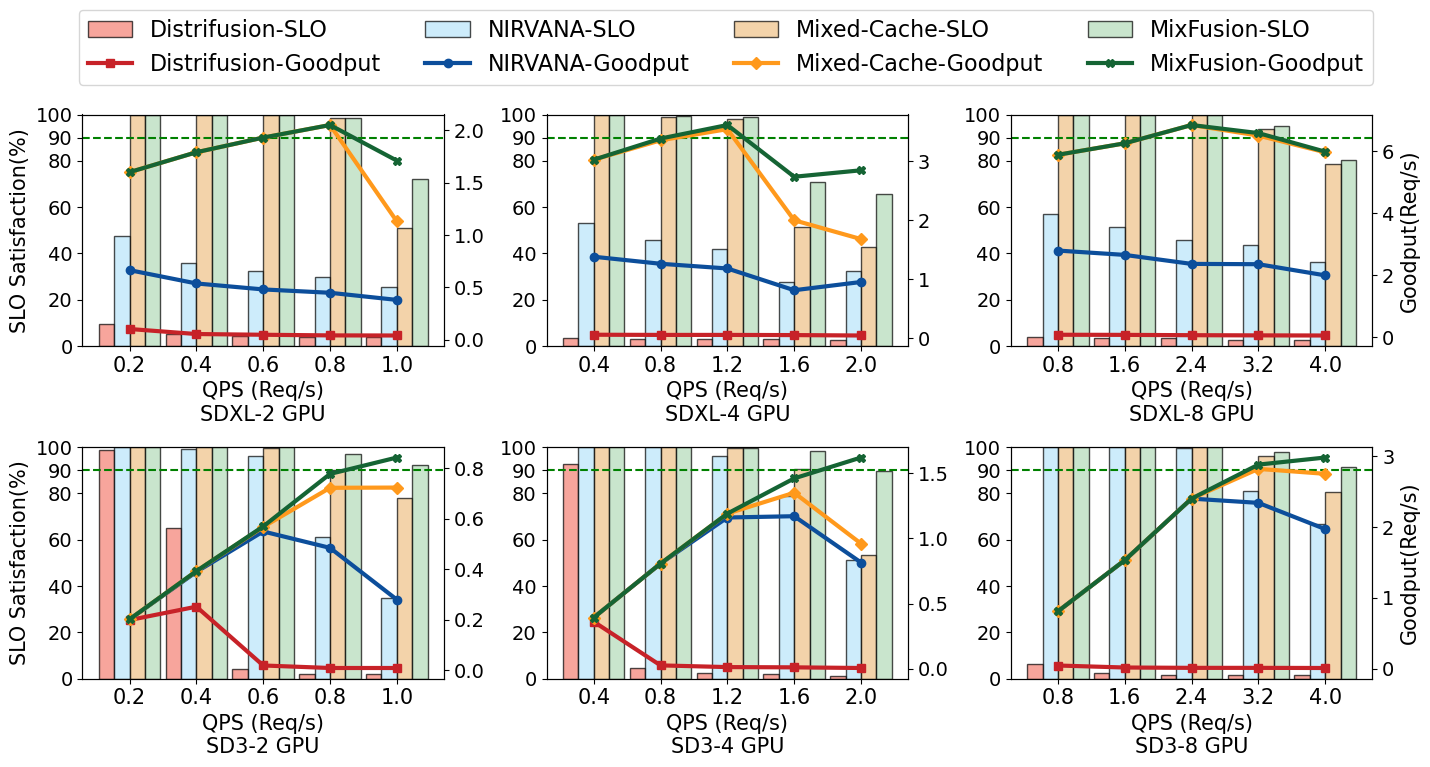

In [341]:
slo_x_axis = np.arange(5)

# 设置阈值
threshold = 90

def plot(axes, model_name):
    if model_name == "SDXL":
        # sdxl
        distrifusion_slo_2 = [0.096, 0.052, 0.044, 0.038, 0.038]
        nirvana_slo_2 = [0.476, 0.36, 0.322, 0.296, 0.256]
        mixed_cache_slo_2 = [1, 1, 1, 0.984, 0.508]
        mixfusion_slo_2 = [1, 1, 1, 0.986, 0.722]

        distrifusion_goodput_2 = [0.102, 0.054, 0.047, 0.041, 0.04]
        nirvana_goodput_2 = [0.664, 0.537, 0.48, 0.448, 0.38]
        mixed_cache_goodput_2 = [1.6, 1.79, 1.93, 2.05, 1.13]
        mixfusion_goodput_2 = [1.6, 1.79, 1.93, 2.05, 1.71]

        # mixfusion gpu4 qps=0.8 rerun
        distrifusion_slo_4 = [0.034, 0.032, 0.032, 0.03, 0.026]
        nirvana_slo_4 = [0.532, 0.456, 0.418, 0.278, 0.324]
        mixed_cache_slo_4 = [1, 0.988, 0.98, 0.516, 0.428]
        mixfusion_slo_4 = [1, 0.994, 0.99, 0.708, 0.656]

        distrifusion_goodput_4 = [0.053, 0.05, 0.05, 0.047, 0.04]
        nirvana_goodput_4 = [1.38, 1.26, 1.18, 0.81, 0.95]
        mixed_cache_goodput_4 = [3.03, 3.36, 3.55, 2.0, 1.68]
        mixfusion_goodput_4 = [3.03, 3.39, 3.62, 2.74, 2.85]


        distrifusion_slo_8 = [0.038, 0.036, 0.034, 0.028, 0.026]
        nirvana_slo_8 = [0.57, 0.516, 0.458, 0.438, 0.362]
        mixed_cache_slo_8 = [1, 1, 1, 0.936, 0.788]
        mixfusion_slo_8 = [1, 1, 1, 0.95, 0.802]

        distrifusion_goodput_8 = [0.074, 0.07, 0.06, 0.054, 0.05]
        nirvana_goodput_8 = [2.79, 2.65, 2.36, 2.35, 1.99]
        mixed_cache_goodput_8 = [5.88, 6.25, 6.84, 6.5, 5.96]
        mixfusion_goodput_8 = [5.88, 6.25, 6.84, 6.58, 5.98]
        qps = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
    elif model_name == "SD3":
        # sd3
        distrifusion_slo_2 = [0.988, 0.652, 0.042, 0.02, 0.018]
        nirvana_slo_2 = [1, 0.99, 0.962, 0.612, 0.346]
        mixed_cache_slo_2 = [1, 1, 0.996, 0.9, 0.778]
        mixfusion_slo_2 = [1, 1, 1, 0.97, 0.922]

        distrifusion_goodput_2 = [0.198, 0.251, 0.018, 0.008, 0.008]
        nirvana_goodput_2 = [0.201, 0.389, 0.549, 0.484, 0.279]
        mixed_cache_goodput_2 = [0.201, 0.392, 0.567, 0.722, 0.723]
        mixfusion_goodput_2 = [0.201, 0.392, 0.569, 0.777, 0.842]


        distrifusion_slo_4 = [0.928, 0.044, 0.022, 0.02, 0.01]
        nirvana_slo_4 = [1, 0.998, 0.962, 0.788, 0.512]
        mixed_cache_slo_4 = [1, 1, 0.994, 0.904, 0.532]
        mixfusion_slo_4 = [1, 1, 0.996, 0.982, 0.898]

        distrifusion_goodput_4 = [0.361, 0.026, 0.013, 0.011, 0.006]
        nirvana_goodput_4 = [0.393, 0.807, 1.16, 1.17, 0.815]
        mixed_cache_goodput_4 = [0.393, 0.807, 1.19, 1.35, 0.960]
        mixfusion_goodput_4 = [0.393, 0.807, 1.19, 1.46, 1.62]


        distrifusion_slo_8 = [0.064, 0.024, 0.016, 0.016, 0.014]
        nirvana_slo_8 = [1, 1, 0.994, 0.808, 0.666]
        mixed_cache_slo_8 = [1, 1, 1, 0.96, 0.804]
        mixfusion_slo_8 = [1, 1, 1, 0.98, 0.912]

        distrifusion_goodput_8 = [0.044, 0.016, 0.011, 0.011, 0.009]
        nirvana_goodput_8 = [0.809, 1.53, 2.4, 2.34, 1.97]
        mixed_cache_goodput_8 = [0.809, 1.53, 2.4, 2.82, 2.75]
        mixfusion_goodput_8 = [0.809, 1.53, 2.4, 2.88, 2.98]
    
    qps = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
    # 第一个子图
    ax1 = axes[0]
    ax1_twin = ax1.twinx() # 创建共享x轴的第二个Y轴
    bar_width = 0.23
    # 绘制柱状图
    ax1.bar(slo_x_axis, np.array(distrifusion_slo_2) * 100, bar_width, color=colors[distrifusion_c], alpha=bar_alpha, edgecolor='black', label='Distrifusion-SLO')
    ax1.bar(slo_x_axis + bar_width, np.array(nirvana_slo_2) * 100, bar_width, color=colors[nirvana_c], alpha=bar_alpha, edgecolor='black', label='NIRVANA-SLO')
    ax1.bar(slo_x_axis + bar_width * 2, np.array(mixed_cache_slo_2) * 100, bar_width, color=colors[mixcache_c], alpha=bar_alpha, edgecolor='black', label='Mixed-Cache-SLO')
    ax1.bar(slo_x_axis + bar_width * 3, np.array(mixfusion_slo_2) * 100, bar_width, color=colors[mixfusion_c], alpha=bar_alpha, edgecolor='black', label='MixFusion-SLO')
    ax1.set_ylabel('SLO Satisfaction(%)', fontsize=15)
    ax1.set_xlabel(f'QPS (Req/s)\n{model_name}-2 GPU', fontsize=15)
    # ax1.tick_params(axis='y', labelcolor='mediumpurple')
    ax1.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
    ax1.set_ylim(0, 100) # 柱状图Y轴范围
    ax1.set_xticks(slo_x_axis + 1.5 * bar_width, qps * 2, fontsize=15)
    yticks = list(ax1.get_yticks()) # 获取现有刻度
    if threshold not in yticks:
        yticks.append(threshold) # 添加阈值到刻度列表
    yticks.sort() # 排序
    yticklabels = [f'{y:.1f}' for y in yticks] # 格式化为字符串
    if threshold in yticks:
        yticklabels[yticks.index(threshold)] = f'{threshold:.1f} Threshold' # 找到阈值并修改其标签
    ax1.set_yticks(yticks)

    # 绘制折线图
    ax1_twin.plot(slo_x_axis + 1.5 * bar_width, distrifusion_goodput_2, color=dark_colors[distrifusion_c], marker=line_markers[distrifusion_c], linewidth=line_width, label='Distrifusion-Goodput')
    ax1_twin.plot(slo_x_axis + 1.5 * bar_width, nirvana_goodput_2, color=dark_colors[nirvana_c], marker=line_markers[nirvana_c], linewidth=line_width, label='NIRVANA-Goodput')
    ax1_twin.plot(slo_x_axis + 1.5 * bar_width, mixed_cache_goodput_2, color=dark_colors[mixcache_c], marker=line_markers[mixcache_c], linewidth=line_width, label='Mixed-Cache-Goodput')
    ax1_twin.plot(slo_x_axis + 1.5 * bar_width, mixfusion_goodput_2, color=dark_colors[mixfusion_c], marker=line_markers[mixfusion_c], linewidth=line_width, label='MixFusion-Goodput')
    # ax1_twin.set_ylabel('Goodput (Req/s)', fontsize=15)
    # ax1_twin.tick_params(axis='y', labelcolor='red')
    ax1_twin.tick_params(axis='y', labelcolor=right_label_color, labelsize=label_fontsize)
    # ax1_twin.set_ylim(0, 150) # 折线图Y轴范围

    # 添加阈值线
    ax1.axhline(y=threshold, color='green', linestyle='--')

    # 第二个子图
    ax2 = axes[1]
    ax2_twin = ax2.twinx()

    ax2.bar(slo_x_axis, np.array(distrifusion_slo_4) * 100, bar_width, color=colors[distrifusion_c], alpha=bar_alpha, edgecolor='black', label='Distrifusion-SLO')
    ax2.bar(slo_x_axis + bar_width, np.array(nirvana_slo_4) * 100, bar_width, color=colors[nirvana_c], alpha=bar_alpha, edgecolor='black', label='NIRVANA-SLO')
    ax2.bar(slo_x_axis + bar_width * 2, np.array(mixed_cache_slo_4) * 100, bar_width, color=colors[mixcache_c], alpha=bar_alpha, edgecolor='black', label='Mixed-Cache-SLO')
    ax2.bar(slo_x_axis + bar_width * 3, np.array(mixfusion_slo_4) * 100, bar_width, color=colors[mixfusion_c], alpha=bar_alpha, edgecolor='black', label='MixFusion-SLO')

    # ax2.set_ylabel('SLO Satisfaction (%)', fontsize=15)
    # ax2.tick_params(axis='y', labelcolor='mediumpurple')
    ax2.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
    ax2.set_ylim(0, 100)
    ax2.set_xlabel(f'QPS (Req/s)\n{model_name}-4 GPU', fontsize=15)

    ax2_twin.plot(slo_x_axis + 1.5 * bar_width, distrifusion_goodput_4, color=dark_colors[distrifusion_c], marker=line_markers[distrifusion_c], linewidth=line_width, label='Distrifusion-Goodput')
    ax2_twin.plot(slo_x_axis + 1.5 * bar_width, nirvana_goodput_4, color=dark_colors[nirvana_c], marker=line_markers[nirvana_c], linewidth=line_width, label='NIRVANA-Goodput')
    ax2_twin.plot(slo_x_axis + 1.5 * bar_width, mixed_cache_goodput_4, color=dark_colors[mixcache_c], marker=line_markers[mixcache_c], linewidth=line_width, label='Mixed-Cache-Goodput')
    ax2_twin.plot(slo_x_axis + 1.5 * bar_width, mixfusion_goodput_4, color=dark_colors[mixfusion_c], marker=line_markers[mixfusion_c], linewidth=line_width, label='MixFusion-Goodput')

    # ax2_twin.set_ylabel('Goodput (Req/s)', fontsize=15)
    # ax2_twin.tick_params(axis='y', labelcolor='red')
    ax2_twin.tick_params(axis='y', labelcolor=right_label_color, labelsize=label_fontsize)
    # ax2_twin.set_ylim(0, 120)
    ax2.set_xticks(slo_x_axis + 1.5 * bar_width, qps * 4, fontsize=15)
    ax2.axhline(y=threshold, color='green', linestyle='--')
    # ax2.set_title('SD3', fontsize=20)

    yticks = list(ax2.get_yticks()) # 获取现有刻度
    if threshold not in yticks:
        yticks.append(threshold) # 添加阈值到刻度列表
    yticks.sort() # 排序
    yticklabels = [f'{y:.1f}' for y in yticks] # 格式化为字符串
    if threshold in yticks:
        yticklabels[yticks.index(threshold)] = f'{threshold:.1f}' # 找到阈值并修改其标签
    ax2.set_yticks(yticks)

    # 第三个子图
    ax3 = axes[2]
    ax3_twin = ax3.twinx()
    ax3.bar(slo_x_axis, np.array(distrifusion_slo_8) * 100, bar_width, color=colors[distrifusion_c], alpha=bar_alpha, edgecolor='black', label='Distrifusion-SLO')
    ax3.bar(slo_x_axis + bar_width, np.array(nirvana_slo_8) * 100, bar_width, color=colors[nirvana_c], alpha=bar_alpha, edgecolor='black', label='NIRVANA-SLO')
    ax3.bar(slo_x_axis + bar_width * 2, np.array(mixed_cache_slo_8) * 100, bar_width, color=colors[mixcache_c], alpha=bar_alpha, edgecolor='black', label='Mixed-Cache-SLO')
    ax3.bar(slo_x_axis + bar_width * 3, np.array(mixfusion_slo_8) * 100, bar_width, color=colors[mixfusion_c], alpha=bar_alpha, edgecolor='black', label='MixFusion-SLO')

    # ax3.set_ylabel('SLO Satisfaction (%)', fontsize=15)
    # ax3.tick_params(axis='y', labelcolor='mediumpurple')
    ax3.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
    ax3.set_ylim(0, 100)
    ax3.set_xlabel(f'QPS (Req/s)\n{model_name}-8 GPU', fontsize=15)

    ax3_twin.plot(slo_x_axis + 1.5 * bar_width, distrifusion_goodput_8, color=dark_colors[distrifusion_c], marker=line_markers[distrifusion_c], linewidth=line_width, label='Distrifusion-Goodput')
    ax3_twin.plot(slo_x_axis + 1.5 * bar_width, nirvana_goodput_8, color=dark_colors[nirvana_c], marker=line_markers[nirvana_c], linewidth=line_width, label='NIRVANA-Goodput')
    ax3_twin.plot(slo_x_axis + 1.5 * bar_width, mixed_cache_goodput_8, color=dark_colors[mixcache_c], marker=line_markers[mixcache_c], linewidth=line_width, label='Mixed-Cache-Goodput')
    ax3_twin.plot(slo_x_axis + 1.5 * bar_width, mixfusion_goodput_8, color=dark_colors[mixfusion_c], marker=line_markers[mixfusion_c], linewidth=line_width, label='MixFusion-Goodput')

    ax3_twin.set_ylabel('Goodput(Req/s)', fontsize=15)
    # ax3_twin.tick_params(axis='y', labelcolor='red')
    ax3_twin.tick_params(axis='y', labelcolor=right_label_color, labelsize=label_fontsize)
    # ax2_twin.set_ylim(0, 120)
    ax3.set_xticks(slo_x_axis + 1.5 * bar_width, qps * 8, fontsize=15)
    ax3.axhline(y=threshold, color='green', linestyle='--')
    # ax2.set_title('SD3', fontsize=20)

    yticks = list(ax3.get_yticks()) # 获取现有刻度
    if threshold not in yticks:
        yticks.append(threshold) # 添加阈值到刻度列表
    yticks.sort() # 排序
    yticklabels = [f'{y:.1f}' for y in yticks] # 格式化为字符串
    if threshold in yticks:
        yticklabels[yticks.index(threshold)] = f'{threshold:.1f}' # 找到阈值并修改其标签
    ax3.set_yticks(yticks)

    return ax1_twin

fig, axes = plt.subplots(2, 3, figsize=(14.4, 6.8))

ax1 = axes[0][0]
ax1_twin = plot(axes[0], "SDXL")
plot(axes[1], "SD3")

# 设置标题和图例
# ax1.set_title('SDXL')
handles_bar, labels_bar = fig.sca(ax1).get_legend_handles_labels()
handles_plot, labels_plot = fig.sca(ax1_twin).get_legend_handles_labels()
handles = []
labels = []
for index in range(len(handles_bar)):
    handles.append(handles_bar[index])
    handles.append(handles_plot[index])
    labels.append(labels_bar[index])
    labels.append(labels_plot[index])

print(handles, labels)
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(3.6, 1.5), ncol=4, fontsize=legend_fontsize, bbox_transform=ax1.transAxes)

# plt.subplots_adjust(bottom=0.22, top=0.8, left=0.05, right=0.95)
# plt.tight_layout(rect=[0.01, 0.01, 0.99, 0.85])
plt.tight_layout()
plt.savefig(f"sensitivity_gpu_num.pdf", dpi=500, format="pdf", bbox_inches="tight")
plt.show()

# Sensitivity SLO

[<BarContainer object of 3 artists>, <matplotlib.lines.Line2D object at 0x1080d3530>, <BarContainer object of 3 artists>, <matplotlib.lines.Line2D object at 0x1080d23c0>, <BarContainer object of 3 artists>, <matplotlib.lines.Line2D object at 0x1080d0200>, <BarContainer object of 3 artists>, <matplotlib.lines.Line2D object at 0x1080d2f00>] ['Distrifusion-SLO', 'Distrifusion-Goodput', 'NIRVANA-SLO', 'NIRVANA-Goodput', 'Mixed-Cache-SLO', 'Mixed-Cache-Goodput', 'MixFusion-SLO', 'MixFusion-Goodput']


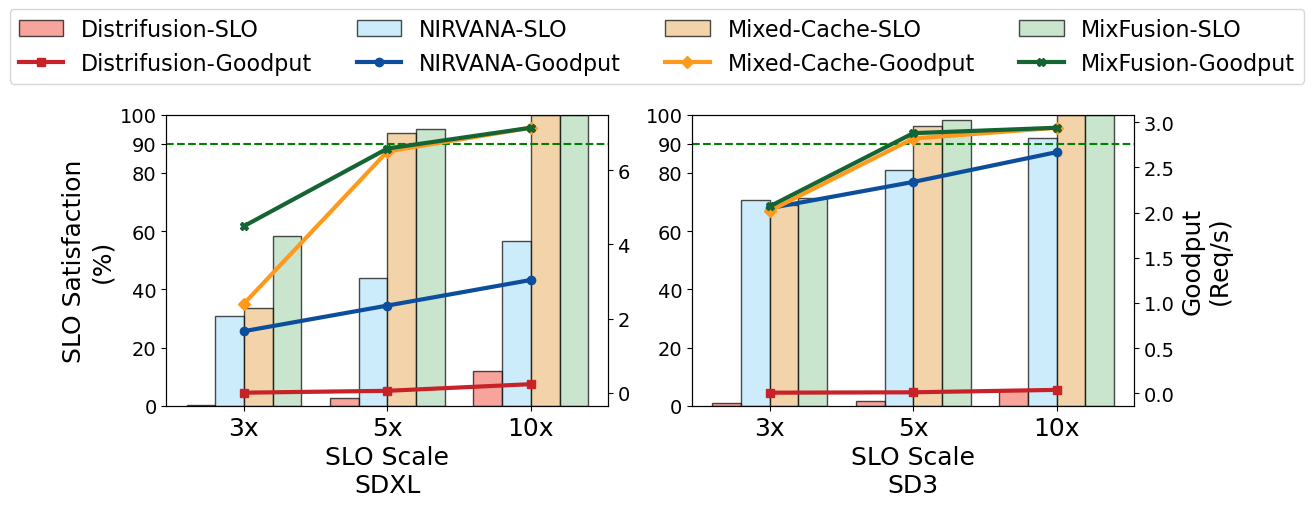

In [338]:
# sdxl
sdxl_distrifusion_slo = [0.002, 0.028, 0.12]
sdxl_nirvana_slo = [0.31, 0.438, 0.566]
sdxl_mixed_cache_slo = [0.336, 0.936, 1]
sdxl_mixfusion_slo = [0.584, 0.95, 1]

# sd3
sd3_distrifusion_slo = [0.01, 0.016, 0.054]
sd3_nirvana_slo = [0.708, 0.808, 0.92]
sd3_mixed_cache_slo = [0.688, 0.96, 1.0]
sd3_mixfusion_slo = [0.714, 0.982, 1.0]

# sdxl
sdxl_distrifusion_goodput = [0.0038, 0.054, 0.233]
sdxl_nirvana_goodput = [1.66, 2.35, 3.04]
sdxl_mixed_cache_goodput = [2.4, 6.5, 7.14]
sdxl_mixfusion_goodput = [4.49, 6.58, 7.14]

# sd3
sd3_distrifusion_goodput = [0.007, 0.011, 0.038]
sd3_nirvana_goodput = [2.05, 2.34, 2.67]
sd3_mixed_cache_goodput = [2.02, 2.82, 2.94]
sd3_mixfusion_goodput = [2.07, 2.88, 2.94]


slo_x_axis = np.arange(3)
SLO = ["3x", "5x", "10x"]
# 设置阈值
threshold = 90

# 创建图和3个子图
fig, axes = plt.subplots(1, 2, figsize=(12, 4.2))

# 第一个子图
ax1 = axes[0]
ax1_twin = ax1.twinx() # 创建共享x轴的第二个Y轴
bar_width = 0.2
# 绘制柱状图
ax1.bar(slo_x_axis, np.array(sdxl_distrifusion_slo) * 100, bar_width, color=colors[distrifusion_c], alpha=bar_alpha, edgecolor='black', label='Distrifusion-SLO')
ax1.bar(slo_x_axis + bar_width, np.array(sdxl_nirvana_slo) * 100, bar_width, color=colors[nirvana_c], alpha=bar_alpha, edgecolor='black', label='NIRVANA-SLO')
ax1.bar(slo_x_axis + bar_width * 2, np.array(sdxl_mixed_cache_slo) * 100, bar_width, color=colors[mixcache_c], alpha=bar_alpha, edgecolor='black', label='Mixed-Cache-SLO')
ax1.bar(slo_x_axis + bar_width * 3, np.array(sdxl_mixfusion_slo) * 100, bar_width, color=colors[mixfusion_c], alpha=bar_alpha, edgecolor='black', label='MixFusion-SLO')
ax1.set_ylabel('SLO Satisfaction\n(%)', fontsize=18)
ax1.set_xlabel('SLO Scale\nSDXL', fontsize=18)
# ax1.tick_params(axis='y', labelcolor='mediumpurple')
ax1.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
ax1.set_ylim(0, 100) # 柱状图Y轴范围
ax1.set_xticks(slo_x_axis + 1.5 * bar_width, SLO, fontsize=18)
yticks = list(ax1.get_yticks()) # 获取现有刻度
if threshold not in yticks:
    yticks.append(threshold) # 添加阈值到刻度列表
yticks.sort() # 排序
yticklabels = [f'{y:.1f}' for y in yticks] # 格式化为字符串
if threshold in yticks:
    yticklabels[yticks.index(threshold)] = f'{threshold:.1f} Threshold' # 找到阈值并修改其标签
ax1.set_yticks(yticks)

# 绘制折线图
ax1_twin.plot(slo_x_axis + 1.5 * bar_width, sdxl_distrifusion_goodput, color=dark_colors[distrifusion_c], marker=line_markers[distrifusion_c], linewidth=line_width, label='Distrifusion-Goodput')
ax1_twin.plot(slo_x_axis + 1.5 * bar_width, sdxl_nirvana_goodput, color=dark_colors[nirvana_c], marker=line_markers[nirvana_c], linewidth=line_width, label='NIRVANA-Goodput')
ax1_twin.plot(slo_x_axis + 1.5 * bar_width, sdxl_mixed_cache_goodput, color=dark_colors[mixcache_c], marker=line_markers[mixcache_c], linewidth=line_width, label='Mixed-Cache-Goodput')
ax1_twin.plot(slo_x_axis + 1.5 * bar_width, sdxl_mixfusion_goodput, color=dark_colors[mixfusion_c], marker=line_markers[mixfusion_c], linewidth=line_width, label='MixFusion-Goodput')
# ax1_twin.set_ylabel('Goodput (Req/s)', fontsize=18)
# ax1_twin.tick_params(axis='y', labelcolor='lightcoral')
ax1_twin.tick_params(axis='y', labelcolor=right_label_color, labelsize=label_fontsize)
# ax1_twin.set_ylim(0, 150) # 折线图Y轴范围

# 添加阈值线
ax1.axhline(y=threshold, color='green', linestyle='--')

# 设置标题和图例
# ax1.set_title('SDXL')
handles_bar, labels_bar = fig.sca(ax1).get_legend_handles_labels()
handles_plot, labels_plot = fig.sca(ax1_twin).get_legend_handles_labels()
handles = []
labels = []
for index in range(len(handles_bar)):
    handles.append(handles_bar[index])
    handles.append(handles_plot[index])
    labels.append(labels_bar[index])
    labels.append(labels_plot[index])

print(handles, labels)



# 第二个子图
ax2 = axes[1]
ax2_twin = ax2.twinx()
ax2.bar(slo_x_axis, np.array(sd3_distrifusion_slo) * 100, bar_width, color=colors[distrifusion_c], alpha=bar_alpha, edgecolor='black', label='Distrifusion-SLO')
ax2.bar(slo_x_axis + bar_width, np.array(sd3_nirvana_slo) * 100, bar_width, color=colors[nirvana_c], alpha=bar_alpha, edgecolor='black', label='NIRVANA-SLO')
ax2.bar(slo_x_axis + bar_width * 2, np.array(sd3_mixed_cache_slo) * 100, bar_width, color=colors[mixcache_c], alpha=bar_alpha, edgecolor='black', label='Mixed-Cache-SLO')
ax2.bar(slo_x_axis + bar_width * 3, np.array(sd3_mixfusion_slo) * 100, bar_width, color=colors[mixfusion_c], alpha=bar_alpha, edgecolor='black', label='MixFusion-SLO')

# ax2.set_ylabel('SLO Satisfaction (%)', fontsize=18)
# ax2.tick_params(axis='y', labelcolor='mediumpurple')
ax2.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
ax2.set_ylim(0, 100)
ax2.set_xlabel('SLO Scale\nSD3', fontsize=18)

ax2_twin.plot(slo_x_axis + 1.5 * bar_width, sd3_distrifusion_goodput, color=dark_colors[distrifusion_c], marker=line_markers[distrifusion_c], linewidth=line_width, label='Distrifusion-Goodput')
ax2_twin.plot(slo_x_axis + 1.5 * bar_width, sd3_nirvana_goodput, color=dark_colors[nirvana_c], marker=line_markers[nirvana_c], linewidth=line_width, label='NIRVANA-Goodput')
ax2_twin.plot(slo_x_axis + 1.5 * bar_width, sd3_mixed_cache_goodput, color=dark_colors[mixcache_c], marker=line_markers[mixcache_c], linewidth=line_width, label='Mixed-Cache-Goodput')
ax2_twin.plot(slo_x_axis + 1.5 * bar_width, sd3_mixfusion_goodput, color=dark_colors[mixfusion_c], marker=line_markers[mixfusion_c], linewidth=line_width, label='MixFusion-Goodput')

ax2_twin.set_ylabel('Goodput\n(Req/s)', fontsize=18)
ax2_twin.tick_params(axis='y', labelcolor='lightcoral')
ax2_twin.tick_params(axis='y', labelcolor=right_label_color, labelsize=label_fontsize)
# ax2_twin.set_ylim(0, 120)
ax2.set_xticks(slo_x_axis + 1.5 * bar_width, SLO, fontsize=18)
ax2.axhline(y=threshold, color='green', linestyle='--')
# ax2.set_title('SD3', fontsize=20)

yticks = list(ax2.get_yticks()) # 获取现有刻度
if threshold not in yticks:
    yticks.append(threshold) # 添加阈值到刻度列表
yticks.sort() # 排序
yticklabels = [f'{y:.1f}' for y in yticks] # 格式化为字符串
if threshold in yticks:
    yticklabels[yticks.index(threshold)] = f'{threshold:.1f}' # 找到阈值并修改其标签
ax2.set_yticks(yticks)

# plt.subplots_adjust(bottom=0.22, top=0.8, left=0.05, right=0.95)
# plt.tight_layout(rect=[0.01, 0.01, 0.99, 0.88])
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(2.6, 1.4), ncol=4, fontsize=legend_fontsize, bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.savefig("sensitivity_slo.pdf", dpi=500, format="pdf", bbox_inches="tight")
plt.show()

# Patch Size

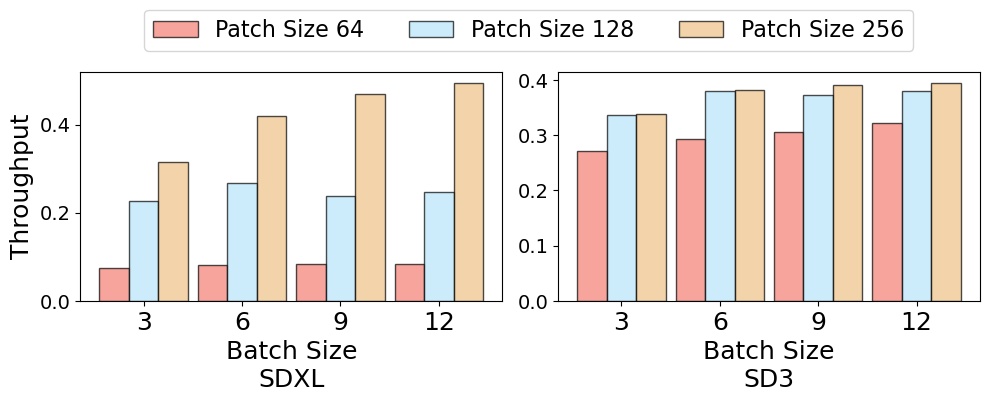

In [330]:
# sdxl
sdxl_patch_256 = np.array([9.52, 14.32, 19.2, 24.24])
sdxl_patch_128 = np.array([13.27, 22.38, 37.66, 48.74])
sdxl_patch_64 = np.array([40.17, 74.4, 108.19, 141.52])

# sd3
sd3_patch_256 = np.array([8.86, 15.68, 23.04, 30.41])
sd3_patch_128 = np.array([8.9, 15.8, 24.17, 31.53])
sd3_patch_64 = np.array([11.02, 20.43, 29.45, 37.25])

slo_x_axis = np.arange(4)

# 设置阈值
threshold = 90

batch_size = np.array([3, 6, 9, 12])
# 创建图和3个子图
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

# 第一个子图
ax1 = axes[0]
# ax1_twin = ax1.twinx() # 创建共享x轴的第二个Y轴
bar_width = 0.3
# 绘制柱状图
ax1.bar(slo_x_axis, (batch_size / sdxl_patch_64), bar_width, color=colors[0], alpha=bar_alpha, edgecolor='black', label='Patch Size 64')
ax1.bar(slo_x_axis + bar_width, (batch_size / sdxl_patch_128), bar_width, color=colors[1], alpha=bar_alpha, edgecolor='black', label='Patch Size 128')
ax1.bar(slo_x_axis + bar_width * 2, (batch_size / sdxl_patch_256), bar_width, color=colors[2], alpha=bar_alpha, edgecolor='black', label='Patch Size 256')
ax1.set_ylabel('Throughput', fontsize=18)
ax1.set_xlabel('Batch Size\nSDXL', fontsize=18)
# ax1.tick_params(axis='y', labelcolor='mediumpurple')
ax1.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
# ax1.set_ylim(0, 100) # 柱状图Y轴范围
ax1.set_xticks(slo_x_axis + 1 * bar_width, batch_size, fontsize=18)
# yticks = list(ax1.get_yticks()) # 获取现有刻度
# if threshold not in yticks:
#     yticks.append(threshold) # 添加阈值到刻度列表
# yticks.sort() # 排序
# yticklabels = [f'{y:.1f}' for y in yticks] # 格式化为字符串
# if threshold in yticks:
#     yticklabels[yticks.index(threshold)] = f'{threshold:.1f} Threshold' # 找到阈值并修改其标签
# ax1.set_yticks(yticks)

# 绘制折线图
# ax1_twin.plot(slo_x_axis + 1 * bar_width, sdxl_nirvana_goodput, color='#389DF2', marker='o', label='NIRVANA-Goodput')
# ax1_twin.plot(slo_x_axis + 1 * bar_width, sdxl_mixed_cache_goodput, color='#D6B656', marker='^', label='Mixed-Cache-Goodput')
# ax1_twin.plot(slo_x_axis + 1 * bar_width, sdxl_mixfusion_goodput, color='#B85450', marker='+', label='MixFusion-Goodput')
# ax1_twin.set_ylabel('Goodput (Req/s)', fontsize=18)
# ax1_twin.tick_params(axis='y', labelcolor='red')
# # ax1_twin.set_ylim(0, 150) # 折线图Y轴范围

# # 添加阈值线
# ax1.axhline(y=threshold, color='gray', linestyle='--')

# 设置标题和图例
# ax1.set_title('SDXL')
# handles_bar, labels_bar = fig.sca(ax1).get_legend_handles_labels()
# handles_plot, labels_plot = fig.sca(ax1_twin).get_legend_handles_labels()
# handles = []
# labels = []
# for index in range(len(handles_bar)):
#     handles.append(handles_bar[index])
#     handles.append(handles_plot[index])
#     labels.append(labels_bar[index])
#     labels.append(labels_plot[index])

# print(handles, labels)

fig.legend(loc="upper right", bbox_to_anchor=(2, 1.32), ncol=3, fontsize=legend_fontsize, bbox_transform=ax1.transAxes)


# 第二个子图
ax2 = axes[1]
# ax2_twin = ax2.twinx()

ax2.bar(slo_x_axis, batch_size / sd3_patch_64, bar_width, color=colors[0], alpha=bar_alpha, edgecolor='black', label='Patch Size 64')
ax2.bar(slo_x_axis + bar_width, batch_size / sd3_patch_128, bar_width, color=colors[1], alpha=bar_alpha, edgecolor='black', label='Patch 128')
ax2.bar(slo_x_axis + bar_width * 2, batch_size / sd3_patch_256, bar_width, color=colors[2], alpha=bar_alpha, edgecolor='black', label='Patch Size 256')

# ax2.set_ylabel('Average Latency (s)', fontsize=18)
# ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.tick_params(axis='y', labelcolor=left_label_color, labelsize=label_fontsize)
# ax2.set_ylim(0, 100)
ax2.set_xlabel('Batch Size\nSD3', fontsize=18)


# ax2_twin.plot(slo_x_axis + 1 * bar_width, sd3_nirvana_goodput, color='#389DF2', marker='o', label='NIRVANA-Goodput')
# ax2_twin.plot(slo_x_axis + 1 * bar_width, sd3_mixed_cache_goodput, color='#D6B656', marker='^', label='Mixed-Cache-Goodput')
# ax2_twin.plot(slo_x_axis + 1 * bar_width, sd3_mixfusion_goodput, color='#B85450', marker='+', label='MixFusion-Goodput')

# ax2_twin.set_ylabel('Goodput (Req/s)', fontsize=18)
# ax2_twin.tick_params(axis='y', labelcolor='darkblue')
# ax2_twin.set_ylim(0, 120)
ax2.set_xticks(slo_x_axis + 1 * bar_width, batch_size, fontsize=18)
# ax2.axhline(y=threshold, color='green', linestyle='--')
# ax2.set_title('SD3', fontsize=20)

# yticks = list(ax2.get_yticks()) # 获取现有刻度
# if threshold not in yticks:
#     yticks.append(threshold) # 添加阈值到刻度列表
# yticks.sort() # 排序
# yticklabels = [f'{y:.1f}' for y in yticks] # 格式化为字符串
# if threshold in yticks:
#     yticklabels[yticks.index(threshold)] = f'{threshold:.1f}' # 找到阈值并修改其标签
# ax2.set_yticks(yticks)

# plt.subplots_adjust(bottom=0.22, top=0.8, left=0.05, right=0.95)
# plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.9])
plt.tight_layout()
plt.savefig("patch_size_throughput.pdf", dpi=500, format="pdf", bbox_inches="tight")
plt.show()